# Einführung in RDF

In der Vorlesung haben wir das Resource Description Framework (RDF) vorgestellt. Als ein wichtiger Baustein des Semantischen Web, unterstützt RDF die Beschreibung strukturierter Information, die Daten und deren Bedeutung. RDF Daten spannen Graphen, Knoten die mittels direkten Kanten verbunden sind. Diese Datenstruktur ist flexibel und hat wichtige Vorteile gegenüber Bäume. In dieser Übung werden wir RDF in der Praxis etwas näher kennenlernen. Der folgende Codeblock müssen Sie ausführen wenn Sie die entsprechenden Module (`rdflib`, `pydot`, `shortid`) nicht bereits installiert haben. Das können Sie testen indem Sie den zweiten Codeblock ausführen. Erhalten Sie dabei Fehlermeldungen, führen Sie den ersten und danach der zweite Codeblock aus. Warten Sie bis der erste Codeblock ausgeführt wurde bevor Sie den zweiten ausführen. Auf Azure Notebooks kann das 1-2 Minuten dauern. Lesen Sie die Ausgabe und stellen Sie sicher, dass die drei Module erfolgreich installiert wurden.

In [4]:
!pip install pydot
!pip install rdflib
!pip install shortid

In [1]:
import io
import pydot
from rdflib import Graph, URIRef, Namespace, Literal
from rdflib.namespace import RDF, XSD
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
from shortid import ShortId

sid = ShortId()

Der *Unified Resource Identifier* (URI) ist ein zentrales Konzept in RDF. Der Aufbau einer URI haben wir in der Vorlesung erläutert. In praxis wird meist der `http` *scheme* verwendet. Die *authority* ist meist die eigene Domäne über die man frei verfügen kann (z.B. persönliche Domäne, die der eigenen Firma, etc.). Hier benutzen wir `example.org` und definieren `http://example.org#` als *namespace* für die Dinge die wir beschreiben, insb. unsere Pink Floyd Alben. 

Ein weiteres zentrales Konzept in RDF is das *statement*, die elementare Informationseinheit bestehend aus zwei über eine gerichtete Kante verbundene Knoten.

Zuerst definieren wir unser *namespace* und Hilfsfunktionen die das Erstellen von URIs und *statements* etwas erleichern. Führen Sie den folgenden Codeblock einfach aus.

In [2]:
ex = Namespace('http://example.org#')

def uri(fragment=None):
    if fragment == None:
        fragment = sid.generate()
    return URIRef('{}{}'.format(ex, fragment))

def statement(i, j, k):
    return (i, j, k)

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream)
    (dg,) = pydot.graph_from_dot_data(stream.getvalue())
    display(Image(dg.create_png()))
    
def prettyprint(g):
    print(g.serialize(format='nt').decode('utf-8'))

Nun erstellen wir ein *statement*. Interpretieren Sie die `print()` Ausgabe mit Ihrem Nachbarn. Führen Sie den Codeblock mehrmal aus und schauen Sie wie sich die URI des linken Knotens verändert.

In [3]:
print(statement(uri(), RDF.type, uri('Album')))

# Erklären Sie die Ausgabe: es verändert sich jedes Mal das fragment der URI

(rdflib.term.URIRef('http://example.org#F_3uJ2o4'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://example.org#Album'))


Als nächstes erstellen wir einen Graphen mit dem gleichen *statement* und visualisieren den Graph. 

Führen Sie den Programmcode mehrmals aus. Was ändert sich und warum?

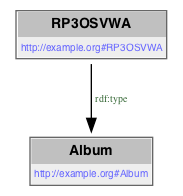

In [7]:
g = Graph()
g.add(statement(uri(), RDF.type, uri('Album')))
visualize(g)

# Warum ändert sich die URI des linken Knotens? Antwort: Es ist nur die URI des Knoten "Album" beschrieben, sowie die Kante rdf:type. Daher ändert sich der linke Knoten. 

Das war nun ein "minimaler" Graph mit nur einem *statement*. Spannender wird es, wenn wir under Album etwas mehr beschreiben. Schauen Sie sich den folgenden Programmcode genau an. Wir benötigen hier weitere Konzepte die wir in der Vorlesung eingeführt haben, z.B. das Literal und Datentypen. Zudem binden wir den Präfix `ex` im erzeugten Graphen.

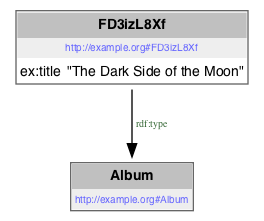

In [9]:
g = Graph()
g.bind('ex', ex)
aAlbum = uri()
g.add(statement(aAlbum, RDF.type, uri('Album')))
g.add(statement(aAlbum, uri('title'), Literal('The Dark Side of the Moon')))
visualize(g)

# Wieviele Kanten hat dieser Graph? Antwort: es besteht einmal die Kante vom Knoten aAlbum zur URI Album, sowie die Kante vom Literal "The Dark Side of the Moon" zum Knoten Album.  

Wir können den Graph auch anders ausdrucken, per *statement*. Beachten Sie, dass sich die Reihenfolge ändern kann. RDF ist eine *statement* Menge ohne implizite Sortierung. Erinnern Sie sich, dass bei XML die Sortierung von XML Elemente in der Baumstruktur klar definiert ist. Bei RDF gibt es keine equivalente Sortierung.

In [10]:
prettyprint(g)

<http://example.org#FD3izL8Xf> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.org#Album> .
<http://example.org#FD3izL8Xf> <http://example.org#title> "The Dark Side of the Moon" .




Wir können nun das Album weiter beschreiben, inklusive das Label und das release Datum welches wir hier in zwei Variante darstellen: einmal als Literal mit Datentype *date* und einmal mittels eines *blank node*. Schauen Sie sich den *blank node* genau an und erklären Sie wir dieser sich von der Album URI unterscheidet. Ist es möglich den *blank node* zur referenzieren?

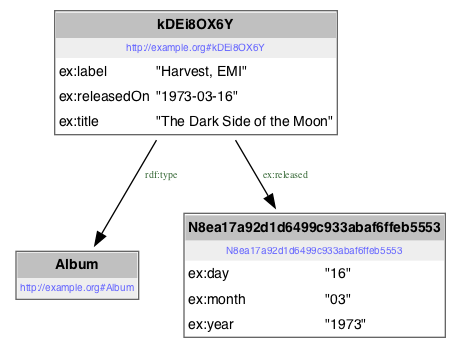

In [11]:
from rdflib import BNode

bn = BNode()

g = Graph()
g.bind('ex', ex)
aAlbum = uri()
g.add(statement(aAlbum, RDF.type, uri('Album')))
g.add(statement(aAlbum, uri('title'), Literal('The Dark Side of the Moon')))
g.add(statement(aAlbum, uri('label'), Literal('Harvest, EMI')))
g.add(statement(aAlbum, uri('releasedOn'), Literal('1973-03-16')))
g.add(statement(aAlbum, uri('released'), bn))
g.add(statement(bn, uri('year'), Literal('1973')))
g.add(statement(bn, uri('month'), Literal('03')))
g.add(statement(bn, uri('day'), Literal('16')))
visualize(g)

# Wieviele statements hat dieser Graph? Antwort: 8 Statements.

Erzeugen Sie nun einen Graphen der die Ressource `Single` mit Title "What God Wants, Part 1" von Author mit Vorname Roger und Nachname Waters im Jahr 1992 veröffentlicht hat.

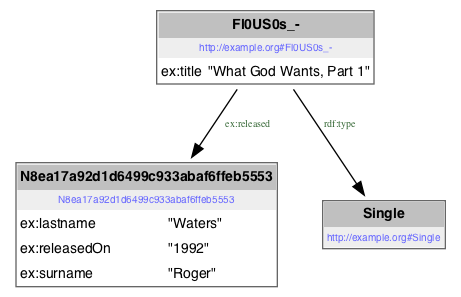

In [17]:
g = Graph()
g.bind('ex', ex)
sSingle = uri()
g.add(statement(sSingle, RDF.type, uri('Single')))
g.add(statement(sSingle, uri('title'), Literal('What God Wants, Part 1')))
g.add(statement(sSingle, uri('released'), bn))
g.add(statement(bn, uri('surname'), Literal('Roger')))
g.add(statement(bn, uri('lastname'), Literal('Waters')))
g.add(statement(bn, uri('releasedOn'), Literal('1992')))
visualize(g)

Und zum Schluss, überlegen Sie sich selbst eine Ressource und beschreiben diese als RDF.

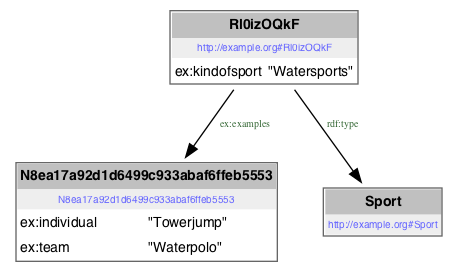

In [18]:
g = Graph()
g.bind('ex', ex)
sSport = uri()
g.add(statement(sSport, RDF.type, uri('Sport')))
g.add(statement(sSport, uri('kindofsport'), Literal('Watersports')))
g.add(statement(sSport, uri('examples'), bn))
g.add(statement(bn, uri('team'), Literal('Waterpolo')))
g.add(statement(bn, uri('individual'), Literal('Towerjump')))
visualize(g)